In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the data
house = pd.read_csv("boston.csv")
house.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


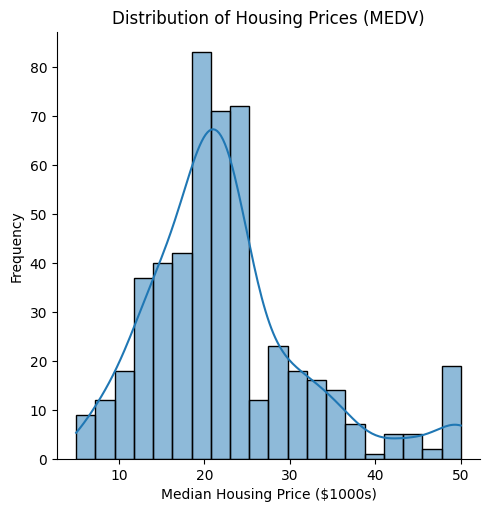

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Housing Prices (MEDV)

sns.displot(house['MEDV'], bins=20, kde=True)
plt.title('Distribution of Housing Prices (MEDV)')
plt.xlabel('Median Housing Price ($1000s)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
rad_medv_mean = house.groupby('RAD')['MEDV'].mean().reset_index()
rad_medv_mean

,RAD,MEDV
0,1,24.365000
1,2,26.833333
2,3,27.928947
3,4,21.387273
4,5,25.706957
5,6,20.976923
6,7,27.105882
7,8,30.358333
8,24,16.403788


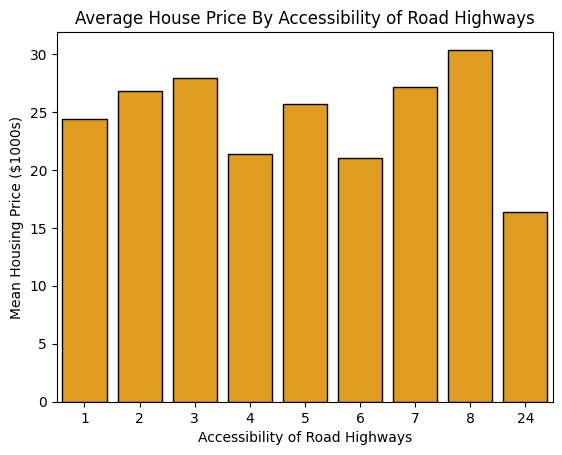

In [ ]:
# Bar Plot Average House Price By Accessibility of Road Highways

sns.barplot(x='RAD', y='MEDV', data=rad_medv_mean, color='orange',edgecolor='black')
plt.title('Average House Price By Accessibility of Road Highways')
plt.xlabel('Accessibility of Road Highways')
plt.ylabel('Mean Housing Price ($1000s)')
plt.show();

In [ ]:
X = house.drop(columns=['MEDV'])
y = house['MEDV']

In [ ]:
X_new=house[['TAX']]
y_new=house['MEDV']

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train_new, x_test_new, y_train_new, y_test_new=train_test_split(X_new,y_new,train_size=0.8,random_state=2)

In [ ]:
from sklearn import linear_model
reg=linear_model.LinearRegression()

In [ ]:
reg.fit(x_train_new, y_train_new)

LinearRegression()

In [ ]:
y_pred_reg=reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
error = mean_absolute_percentage_error(y_pred_reg,y_test)
print("Accuracy of Linear Regression is :%.2f "%((1 - error)*100),'%')

Accuracy of Linear Regression is :61.68  %


In [ ]:
from sklearn.metrics import r2_score

r2_value = r2_score(y_test, y_pred_reg)
print(f"R² Value: {r2_value}")


R² Value: 0.7789207451814409


In [ ]:
from sklearn.metrics import mean_squared_error as mse
mse_value= mse( y_pred_reg, y_test)
print(mse_value)

18.49542012244846


In [ ]:
from sklearn.metrics import root_mean_squared_error as rmse
rmse_value=rmse(y_test, y_pred_reg)
print(rmse_value)

4.300630200615773


In [ ]:
residual=y_test-y_pred_reg
rss=np.sum(residual**2)
print(rss)

1886.5328524897432


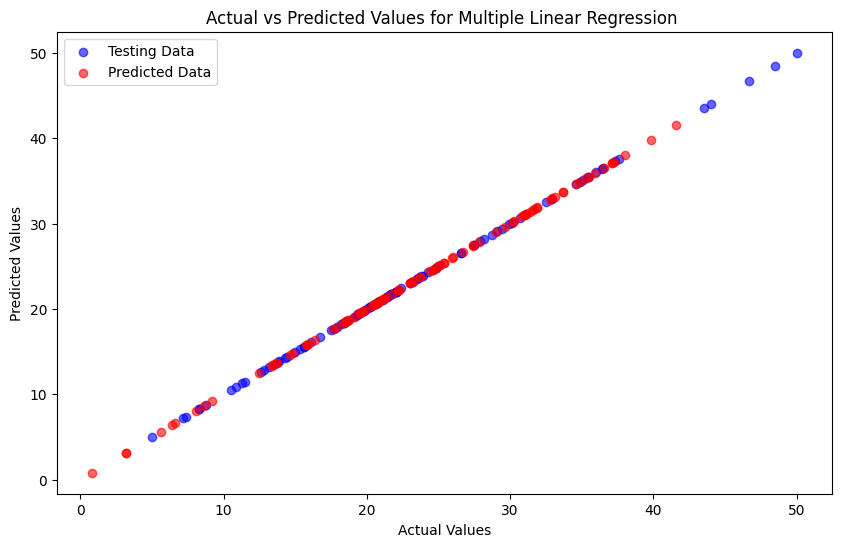

In [ ]:
#  Scatter plot of actual vs predicted values (training and test data)
plt.figure(figsize=(10, 6))

# Plot for training data
plt.scatter(y_test, y_test, color='blue', label='Testing Data', alpha=0.6)

# Plot for test data
plt.scatter(y_pred_reg, y_pred_reg, color='red', label='Predicted Data', alpha=0.6)

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Multiple Linear Regression ')
plt.legend()
plt.show()

In [ ]:
# Initialize lists to store metrics
mape_list = []
r2_list = []
mse_list = []
rmse_list = []

# Run the regression for 10 iterations
for iteration in range(10):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=iteration)

    # Fit the model
    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)

    # Predictions
    y_pred_reg = reg.predict(X_test)

    # Calculate metrics
    error = mean_absolute_percentage_error(y_pred_reg, y_test)
    print("iteration number"+ str(iteration+1)+" "+str(error))
    mape_list.append((1 - error) * 100)
    r2_list.append(r2_score(y_test, y_pred_reg))
    # mse_list.append(mse(y_test, y_pred_reg))
    rmse_list.append(rmse(y_test, y_pred_reg))

# Print average metrics
print("Average Accuracy of Linear Regression: %.2f" % (np.mean(mape_list)), '%')
print("Average R² Value: ", np.mean(r2_list))
print("Average MSE: ", np.mean(mse_list))
print("Average RMSE: ", np.mean(rmse_list))

iteration number1 0.4044056228436099
iteration number2 0.17970488897528894
iteration number3 0.3831852578303507
iteration number4 0.13757949541219613
iteration number5 0.15097188260963265
iteration number6 1.131130435229797
iteration number7 0.31986330021694936
iteration number8 0.2076499020338534
iteration number9 0.18728692339526526
iteration number10 0.2650788359175029
Average Accuracy of Linear Regression: 66.33 %
Average R² Value:  0.7123034880840582
Average MSE:  nan
Average RMSE:  4.9216731459111935


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


POLYNOMIAL REGRESSION MODEL


In [ ]:
from sklearn.preprocessing import PolynomialFeatures


Trr=[]; Tss=[]
n_degree=7

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(X_train)
    X_poly1 = poly_reg.fit_transform(X_test)
    LR = linear_model.LinearRegression()
    LR.fit(X_poly, y_train)

    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mse(y_train, pred1)))

    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mse(y_test, pred2)))

TypeError: 'float' object is not callable

In [ ]:
#Using the 5th Order Polynomial Regression model (degree=5)

poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X_train)
X_poly1 = poly_reg.fit_transform(X_test)
PR = linear_model.LinearRegression()
PR.fit(X_poly, y_train)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

from sklearn.metrics import mean_squared_error

rss = sum((y_train - pred1) ** 2)
mse = mean_squared_error(y_train, pred1)
print("RSS: ", rss)
print("MSE: ", mse)


RSS:  3.216757343634998e-16
MSE:  7.962270652561876e-19


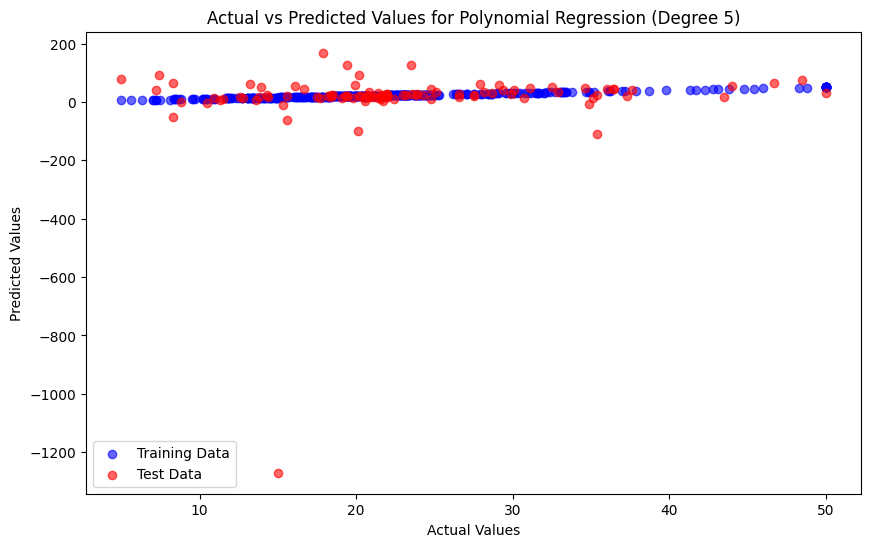

In [ ]:
#  Scatter plot of actual vs predicted values (training and test data)
plt.figure(figsize=(10, 6))

# Plot for training data
plt.scatter(y_train, pred1, color='blue', label='Training Data', alpha=0.6)

# Plot for test data
plt.scatter(y_test, pred2, color='red', label='Test Data', alpha=0.6)

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Polynomial Regression (Degree 5)')
plt.legend()
plt.show()